In [3]:
import numpy as np
import pandas as pd

In [4]:
pip install kmapper

  Using cached kmapper-2.0.1-py3-none-any.whl (125 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import kmapper as km
#from kmapper import jupyter

In [6]:
import matplotlib.pyplot as plt

In [7]:
prostate_data = pd.read_csv("Data/WA_OR_Incidence_Death.csv",index_col = False)
pop_data = pd.read_csv("Data/Pop_short.csv",index_col = False)
pop_health_data = pd.read_csv("Data/Pop_health.csv",index_col = False)

In [12]:
prostate_data.dtypes
pop_health_data.dtypes

County         object
Data.Type      object
Cancer.Site    object
State          object
Year           object
                ...  
P0040065        int64
P0040072        int64
H0010001        int64
H0010002        int64
H0010003        int64
Length: 125, dtype: object

In [13]:
print(pop_health_data)
pop_health_data.head(4)
pop_health_data.dtypes

      County  Data.Type Cancer.Site       State         Year  \
0      Adams  Incidence    Prostate  Washington    2014-2018   
1      Adams  Mortality    Prostate  Washington    2014-2018   
2     Asotin  Mortality    Prostate  Washington    2014-2018   
3     Asotin  Incidence    Prostate  Washington    2014-2018   
4      Baker  Mortality    Prostate      Oregon  2014 - 2018   
..       ...        ...         ...         ...          ...   
207  Whitman  Incidence    Prostate  Washington    2014-2018   
208   Yakima  Incidence    Prostate  Washington    2014-2018   
209  Yamhill  Incidence    Prostate      Oregon    2014-2018   
210  Yamhill  Mortality    Prostate      Oregon  2014 - 2018   
211  Yamhill  Incidence    Prostate      Oregon    2014-2018   

     Average.Annual.Population  Average.Annual.Observations Column1   X  \
0                       9989.0                          6.0    85.5 NaN   
1                       9989.0                          NaN     NaN NaN   
2     

County         object
Data.Type      object
Cancer.Site    object
State          object
Year           object
                ...  
P0040065        int64
P0040072        int64
H0010001        int64
H0010002        int64
H0010003        int64
Length: 125, dtype: object

In [58]:
print(prostate_data)
prostate_data.head(4)
prostate_data.dtypes

     Data Type Cancer Site     County       State         Year  \
0            0    Prostate      Baker      Oregon  2014 - 2018   
1            0    Prostate     Benton      Oregon  2014 - 2018   
2            0    Prostate  Clackamas      Oregon  2014 - 2018   
3            0    Prostate    Clatsop      Oregon  2014 - 2018   
4            0    Prostate   Columbia      Oregon  2014 - 2018   
..         ...         ...        ...         ...          ...   
177          0    Prostate  Snohomish  Washington    2014-2018   
178          0    Prostate    Spokane  Washington    2014-2018   
179          0    Prostate    Stevens  Washington    2014-2018   
180          0    Prostate   Thurston  Washington    2014-2018   
181          0    Prostate  Wahkiakum  Washington    2014-2018   

     Average Annual Population  Average Annual Observations Column1  \
0                          NaN                         15.0    21.3   
1                          NaN                         49.0    22

Data Type                        int64
Cancer Site                     object
County                          object
State                           object
Year                            object
Average Annual Population      float64
Average Annual Observations    float64
Column1                         object
Unnamed: 8                     float64
dtype: object

In [10]:
def DataType2quant(x): #an if statement that is handy to use to convert qualitative entries to quantitative ones
    if x=="Mortality":
        return 1
    elif x=="Incidence":
        return -1
    else:
        return 0     
    
def AnnPopFix(x): #an if statement that cleans up the nan entries
    if x!=x:   #captures the NaN entries 
        return 0
    else:
        return x
    
prostate_data["Data Type"] = prostate_data["Data Type"].apply(DataType2quant) #notice that we are modifying the original data_train
prostate_data["Average Annual Observations"] = prostate_data["Average Annual Observations"].apply(AnnPopFix)

sub_prostate_data = np.array([prostate_data["Data Type"],prostate_data["Average Annual Observations"]]) #entered as rows
sub_prostate_data = sub_prostate_data.transpose() #got back into columns

In [11]:
print(sub_prostate_data)

[[ 1.000e+00  1.500e+01]
 [ 1.000e+00  4.900e+01]
 [ 1.000e+00  2.300e+02]
 [ 1.000e+00  3.000e+01]
 [ 1.000e+00  3.800e+01]
 [ 1.000e+00  5.900e+01]
 [ 1.000e+00  1.700e+01]
 [ 1.000e+00  2.000e+01]
 [ 1.000e+00  9.400e+01]
 [ 1.000e+00  9.800e+01]
 [ 1.000e+00  0.000e+00]
 [ 1.000e+00  0.000e+00]
 [ 1.000e+00  0.000e+00]
 [ 1.000e+00  1.700e+01]
 [ 1.000e+00  1.590e+02]
 [ 1.000e+00  1.900e+01]
 [ 1.000e+00  8.200e+01]
 [ 1.000e+00  6.600e+01]
 [ 1.000e+00  0.000e+00]
 [ 1.000e+00  2.190e+02]
 [ 1.000e+00  3.000e+01]
 [ 1.000e+00  9.000e+01]
 [ 1.000e+00  1.900e+01]
 [ 1.000e+00  1.620e+02]
 [ 1.000e+00  0.000e+00]
 [ 1.000e+00  3.000e+02]
 [ 1.000e+00  5.100e+01]
 [ 1.000e+00  0.000e+00]
 [ 1.000e+00  2.800e+01]
 [ 1.000e+00  3.100e+01]
 [ 1.000e+00  2.100e+01]
 [ 1.000e+00  0.000e+00]
 [ 1.000e+00  2.200e+01]
 [ 1.000e+00  1.920e+02]
 [ 1.000e+00  0.000e+00]
 [ 1.000e+00  6.400e+01]
 [-1.000e+00  3.500e+01]
 [-1.000e+00  3.500e+01]
 [-1.000e+00  2.400e+02]
 [-1.000e+00  2.400e+02]


In [74]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
norm_projected_data = mapper.fit_transform(sub_prostate_data, projection= [0,1]) 

# Create a cover with 10 elements
cover = km.Cover(n_cubes=5)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, sub_prostate_data, cover=cover)

# Visualize it
_ = mapper.visualize(graph, title="Data Type by Annual Average Observations")


##use an IFrame to display a vis with a set width and height
from IPython.display import IFrame
IFrame(src="mapper_visualization_output.html", width=800, height=600)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (182, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (182, 2) using lens shaped (182, 2)

Creating 25 hypercubes.

Created 1 edges and 12 nodes in 0:00:00.015713.
Wrote visualization to: mapper_visualization_output.html


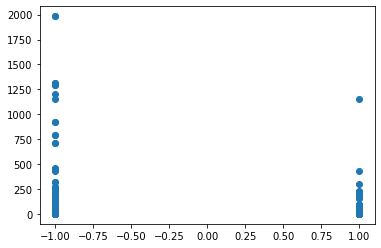

In [54]:
plt.scatter(sub_prostate_data[:, 0], sub_prostate_data[:, 1], marker='o', c=None)

In [55]:
prostate_data.dtypes

Data Type                        int64
Cancer Site                     object
County                          object
State                           object
Year                            object
Average Annual Population      float64
Average Annual Observations    float64
Column1                         object
Unnamed: 8                     float64
dtype: object

In [ ]:
def DataType2quant(x): #an if statement that is handy to use to convert qualitative entries to quantitative ones
    if x=="Mortality":
        return 1
    elif x=="Incidence":
        return -1
    else:
        return 0     
    
def AnnPopFix(x): #an if statement that cleans up the nan entries
    if x!=x:   #captures the NaN entries 
        return 0
    else:
        return x
    
prostate_data["Data Type"] = prostate_data["Data Type"].apply(DataType2quant) #notice that we are modifying the original data_train
prostate_data["Average Annual Observations"] = prostate_data["Average Annual Observations"].apply(AnnPopFix)

sub_prostate_data = np.array([prostate_data["Data Type"],prostate_data["Average Annual Observations"]]) #entered as rows
sub_prostate_data = sub_prostate_data.transpose() #got back into columns